In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
import eispac
from sunraster.instr.spice import read_spice_l2_fits


import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)
from ipywidgets import interactive, widgets
from IPython.display import display, clear_output
from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os
from sun_blinker import SunBlinker
import juanfit
from juanfit import SpectrumFitSingle, SpectrumFit2D
from copy import deepcopy

In [2]:
spice_raster = read_spice_l2_fits("../../src/SPICE/20221022/lvl2/solo_L2_spice-n-ras_20221022T205536_V06_150995382-000.fits")

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-OBS to 59874.871951 from DATE-OBS.
Set MJD-BEG to 59874.871951 from DATE-BEG.
Set MJD-AVG to 59874.950052 from DATE-AVG.
Set MJD-END to 59875.028152 from DATE-END'. [astropy.wcs.wcs]


In [3]:
spice_raster.keys()

dict_keys(['O III 703 / Mg IX 706 (Merged)', 'S IV 750 - Peak', 'N IV 765 - Peak', 'Ne VIII 770 - Peak', 'S V 786 / O IV 787 (Merged)', 'N III 991 (Merged)'])

In [6]:
spice_MgIX_706_window = spice_raster['O III 703 / Mg IX 706 (Merged)']
spice_MgIX_749_window = spice_raster['S IV 750 - Peak']
spice_NIV_765_window = spice_raster['N IV 765 - Peak']
spice_NeVIII_770_window = spice_raster['Ne VIII 770 - Peak']
spice_SV_786_window = spice_raster['S V 786 / O IV 787 (Merged)']
spice_NIII_991_window = spice_raster['N III 991 (Merged)']

In [8]:
spice_MgIX_706_window.meta.keys()

dict_keys(['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'NAXIS4', 'EXTEND', 'DATE', '', 'EXTNAME', 'FILENAME', 'STUDYTYP', 'STUDYDES', 'STUDY', 'OBS_MODE', 'OBS_TYPE', 'AUTHOR', 'OBS_ID', 'SPIOBSID', 'OBS_DESC', 'PURPOSE', 'READMODE', 'TRIGGERD', 'TARGET', 'SOOPNAME', 'SOOPTYPE', 'STP', 'SETFILE', 'SETVER', 'APID', 'NRASTERS', 'RASTERNO', 'STUDY_ID', 'MISOSTUD', 'XSTART', 'XPOSURE', 'FOCUSPOS', 'POINT_ID', 'MOSAICID', 'SVO_SEP1', 'SVO_SEP2', 'SVO_SEP3', 'SVO_SEP4', 'SVO_GRP', 'NWIN', 'NWIN_PRF', 'NWIN_DUM', 'NWIN_INT', 'NWIN_ORG', 'PXCOV3', 'WAVECOV', 'TIMESYS', 'DATEREF', 'DATE-BEG', 'DATE-OBS', 'DATE-AVG', 'DATE-END', 'SEQ_BEG', 'TELAPSE', 'OBT_BEG', 'LEVEL', 'CREATOR', 'ORIGIN', 'VERS_SW', 'VERS_CAL', 'VERSION', 'OBSRVTRY', 'INSTRUME', 'CROTA', 'COMPLETE', 'PCT_CMPL', 'STUDYFLG', 'NOSPECTR', 'CALMODE', 'DBLEXP', 'DBLEXPNO', 'DARKMAP', 'BLACKLEV', 'WIN_TYPE', 'DATAPROD', 'TELESCOP', 'DETECTOR', 'WINNO', 'WINTABID', 'MISOWIN', 'WINSHIFT', 'SLIT_ID', 'SLIT_WID', 'DUMBBELL

In [9]:
spice_MgIX_706_window.meta["exposure time"]

<Quantity [60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
           6

In [10]:
spice_MgIX_706_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.09227812314166667 0.13431963613527778 7.038117420000001e-08 6747.875 
CRPIX : 112.5 416.5 40.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.995067849204 -0.0272294805763 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.361372133155 0.995067849204 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -60.25 0.0 0.0 1.0 
CDELT : 0.0011111111111111111 0.00030500000000000004 9.751700000000001e-12 1.0 
NAXIS : 224  832  80  1

In [11]:
MgIX_706_window_rebin = spice_MgIX_706_window.rebin((1,80,1,1))[0,0,:,:]

In [12]:
MgIX_706_window_rebin_map = sunpy.map.Map(MgIX_706_window_rebin.data, MgIX_706_window_rebin.meta)

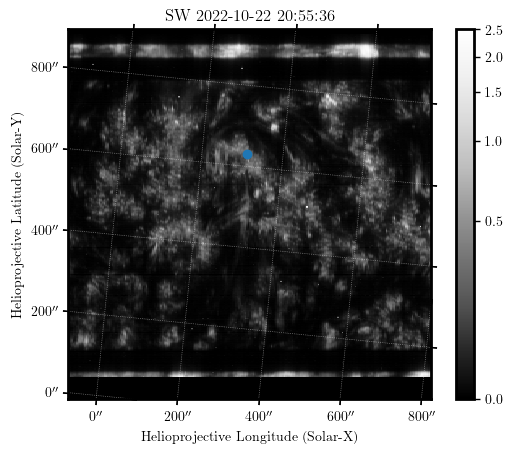

In [26]:
MgIX_706_window_rebin_map.plot(aspect=MgIX_706_window_rebin_map.scale.axis2/MgIX_706_window_rebin_map.scale.axis1,
                               cmap="Greys_r",norm=ImageNormalize(vmin=0,vmax=2.5,stretch=AsinhStretch(0.1)))
plt.colorbar()
plt.scatter(110,550)

In [100]:
MgIX_706_window_wvl = spice_MgIX_706_window.wcs.slice((0,slice(0,80),0,0)).pixel_to_world(np.arange(80)).value*1e10

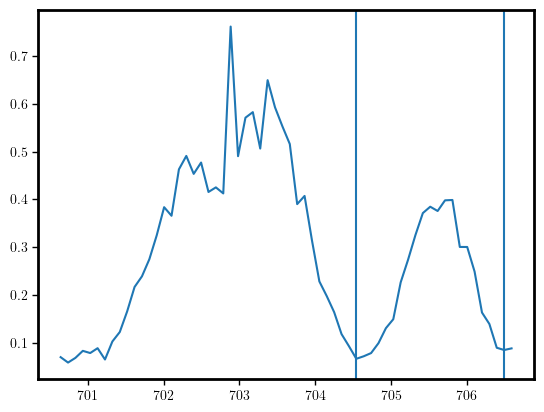

In [101]:
plt.plot(MgIX_706_window_wvl,  spice_MgIX_706_window.data[0,:,550,110])
plt.axvline(MgIX_706_window_wvl[47])
plt.axvline(MgIX_706_window_wvl[67])

In [28]:
print(MgIX_706_window_rebin_map.scale.axis1,MgIX_706_window_rebin_map.scale.axis2)

4.0 arcsec / pix 1.098 arcsec / pix


In [72]:
MgIX_706_window_rebin_spatial = spice_MgIX_706_window[:,:,144:-100,:].rebin((1,1,4,1))[0,:,:,:]

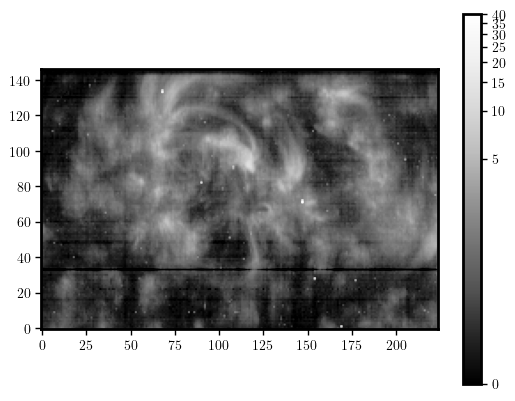

In [73]:
plt.imshow(np.nansum(MgIX_706_window_rebin_spatial.data[47:68,:,:],axis=0),origin="lower",cmap="Greys_r",
           norm=ImageNormalize(vmin=0,vmax=40,stretch=AsinhStretch(0.01)))
plt.colorbar()

In [74]:
MgIX_706_window_rebin_spatial_wcs = MgIX_706_window_rebin_map.wcs.slice((np.s_[144:-100:4],np.s_[:]))

In [75]:
MgIX_706_window_rebin_spatial_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.092278123141667 0.13431963613528 
CRPIX : 112.5 68.5 
PC1_1 PC1_2  : 0.995067849204 -0.0272294805763 
PC2_1 PC2_2  : 0.361372133155 0.995067849204 
CDELT : 0.0011111111111111 0.00122 
NAXIS : 224  147

In [76]:
MgIX_706_window_rebin_spatial_wcs_new = deepcopy(MgIX_706_window_rebin_spatial_wcs)

In [77]:
MgIX_706_window_rebin_spatial_wcs_new.wcs.pc = np.array([[MgIX_706_window_rebin_spatial_wcs.wcs.pc[0,0],MgIX_706_window_rebin_spatial_wcs.wcs.pc[0,1]*4],
                                                  [MgIX_706_window_rebin_spatial_wcs.wcs.pc[1,0]/4,MgIX_706_window_rebin_spatial_wcs.wcs.pc[1,1]]])

In [78]:
MgIX_706_int_map = sunpy.map.Map(np.nansum(MgIX_706_window_rebin_spatial.data[47:68,:,:],axis=0), MgIX_706_window_rebin_spatial_wcs_new)

In [79]:
print(MgIX_706_int_map.scale.axis1,MgIX_706_int_map.scale.axis2)

0.0011111111111111 deg / pix 0.00122 deg / pix


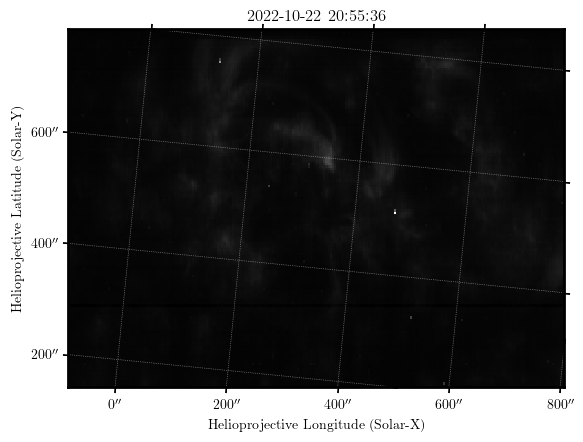

In [81]:
MgIX_706_int_map.plot(aspect=MgIX_706_int_map.scale.axis2/MgIX_706_int_map.scale.axis1,)

In [82]:
MgIX_706_int_map.save("../../src/SPICE/20221022/lvl3/MgIX_706_int_map_205536.fits")

In [83]:
spice_MgIX_749_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.09227812314166667 0.13431963613527778 7.496447320000001e-08 6747.875 
CRPIX : 112.5 416.5 25.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.995067849204 -0.0272294805763 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.361372133155 0.995067849204 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -60.25 0.0 0.0 1.0 
CDELT : 0.0011111111111111111 0.00030500000000000004 9.751700000000001e-12 1.0 
NAXIS : 224  832  50  1

In [84]:
MgIX_749_window_rebin = spice_MgIX_749_window.rebin((1,50,1,1))[0,0,:,:]

In [85]:
MgIX_749_window_rebin_map = sunpy.map.Map(MgIX_749_window_rebin.data, MgIX_749_window_rebin.meta)

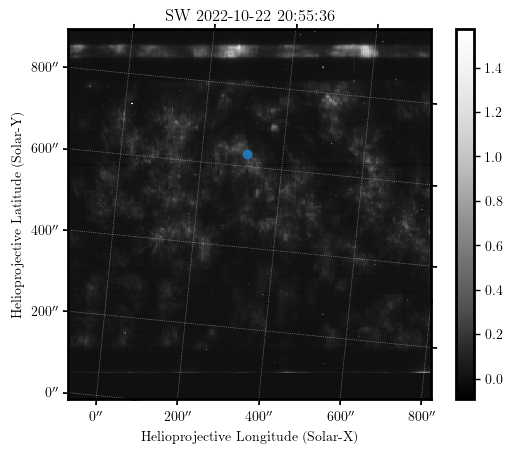

In [87]:
MgIX_749_window_rebin_map.plot(aspect=MgIX_749_window_rebin_map.scale.axis2/MgIX_749_window_rebin_map.scale.axis1,
                                 cmap="Greys_r",)
plt.colorbar()
plt.scatter(110,550)

In [102]:
MgIX_749_window_wvl = spice_MgIX_749_window.wcs.slice((0,slice(0,50),0,0)).pixel_to_world(np.arange(50)).value*1e10

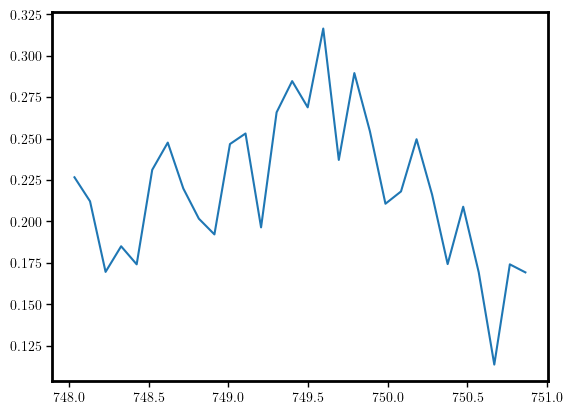

In [103]:
plt.plot(MgIX_749_window_wvl,  spice_MgIX_749_window.data[0,:,550,110])

In [90]:
spice_NIV_765_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.09227812314166667 0.13431963613527778 7.645648330000001e-08 6747.875 
CRPIX : 112.5 416.5 25.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.995067849204 -0.0272294805763 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.361372133155 0.995067849204 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -60.25 0.0 0.0 1.0 
CDELT : 0.0011111111111111111 0.00030500000000000004 9.751700000000001e-12 1.0 
NAXIS : 224  832  50  1

In [91]:
NIV_765_window_rebin = spice_NIV_765_window.rebin((1,50,1,1))[0,0,:,:]

In [92]:
NIV_765_window_rebin_map = sunpy.map.Map(NIV_765_window_rebin.data, NIV_765_window_rebin.meta)

In [93]:
NIV_765_window_rebin_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.092278123141667 0.13431963613528 
CRPIX : 112.5 416.5 
PC1_1 PC1_2  : 0.995067849204 -0.0272294805763 
PC2_1 PC2_2  : 0.361372133155 0.995067849204 
CDELT : 0.0011111111111111 0.000305 
NAXIS : 224  832

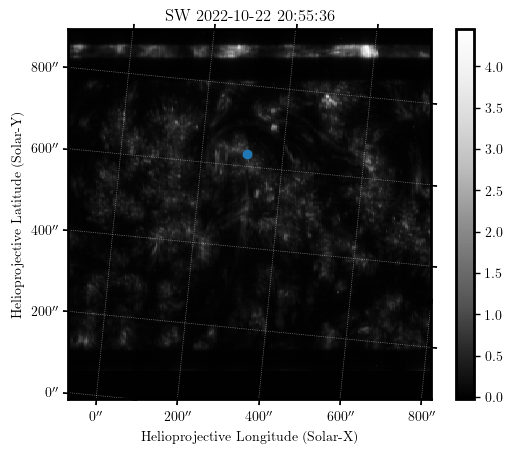

In [95]:
NIV_765_window_rebin_map.plot(aspect=NIV_765_window_rebin_map.scale.axis2/NIV_765_window_rebin_map.scale.axis1,
                                    cmap="Greys_r",)
plt.colorbar()
plt.scatter(110,550)

In [98]:
NIV_765_window_wvl = spice_NIV_765_window.wcs.slice((0,slice(0,50),0,0)).pixel_to_world(np.arange(50)).value*1e10

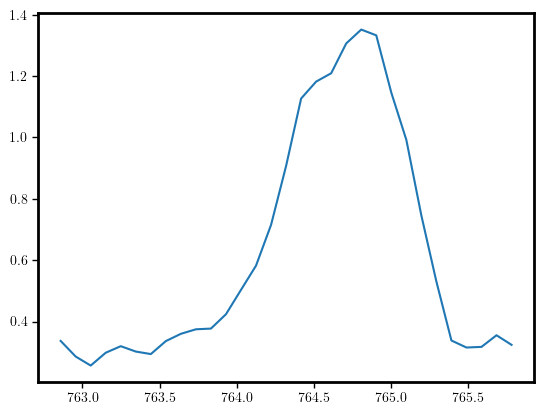

In [99]:
plt.plot(NIV_765_window_wvl,  spice_NIV_765_window.data[0,:,550,110])